# Data Science 03: Feature Engineering

<h3 id="import_data">1. Import Data</h3>


Import libraries: 

In [1]:
# install libraries
#%pip instal pandas
#%pip install numpy

# SciPy is a free and open-source Python library used for scientific computing and technical computing.
# It is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python.
#%pip install scipy

#%pip install seaborn

In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Load the data and store it in dataframe `df`:


In [4]:
path='../../data/raw/exploration_timelaps.csv'
df = pd.read_csv(path)
df.head()

,id,type_brick,time_start,time_verif,time_dest,time_end,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_binned,brick_basic,brick_corner,brick_end,brick_half
0,1,CORNER,13:52:18,13:52:24,13:52:42,13:52:58,49938,49944,49962,49978,2,6,18,16,40,Normal,False,True,False,False
1,2,HALF,13:52:58,13:53:02,13:53:18,13:53:36,49978,49982,49998,50016,3,4,16,18,38,Very short,False,False,False,True
2,4,BASIC,13:56:00,13:56:06,13:56:20,13:56:36,50160,50166,50180,50196,1,6,14,16,36,Extremely short,True,False,False,False
3,6,BASIC,13:58:10,13:58:16,13:58:30,13:58:46,50290,50296,50310,50326,1,6,14,16,36,Extremely short,True,False,False,False
4,9,BASIC,14:00:34,14:00:42,14:00:54,14:01:18,50434,50442,50454,50478,1,8,12,24,44,Very long,True,False,False,False


<h3 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h3>


Import visualization packages "Matplotlib" and "Seaborn". Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.


In [5]:
#%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [6]:
# list the data types for each column
print(df.dtypes)

id                    int64
type_brick           object
time_start           object
time_verif           object
time_dest            object
time_end             object
time_start_sec        int64
time_verif_sec        int64
time_dest_sec         int64
time_end_sec          int64
type                  int64
start_to_verif        int64
verif_to_dest         int64
dest_to_end           int64
total_time            int64
total_time_binned    object
brick_basic            bool
brick_corner           bool
brick_end              bool
brick_half             bool
dtype: object


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [7]:
df[['type', 'start_to_verif', 'verif_to_dest', 'dest_to_end', 'total_time']].corr()

,type,start_to_verif,verif_to_dest,dest_to_end,total_time
type,1.000000,-0.087829,0.293866,-0.198717,-0.063490
start_to_verif,-0.087829,1.000000,-0.313901,-0.539253,-0.028406
verif_to_dest,0.293866,-0.313901,1.000000,-0.139202,0.400346
dest_to_end,-0.198717,-0.539253,-0.139202,1.000000,0.588880
total_time,-0.063490,-0.028406,0.400346,0.588880,1.000000


The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.


<h3>Continuous Numerical Variables:</h3> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well. </p>


<h4>Positive Linear Relationship</h4>

Let's find the scatterplot of "total_time" and "start_to_verif".

(0.0, 20.8)

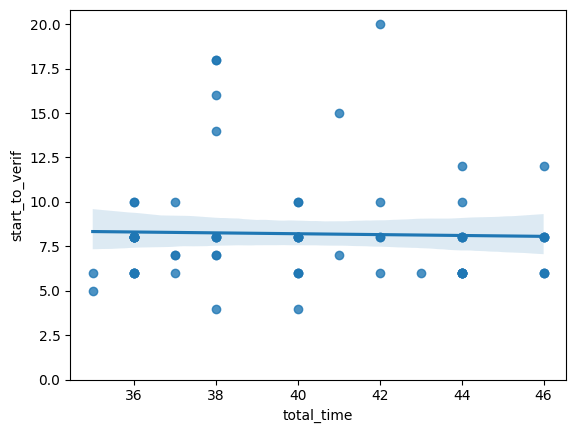

In [8]:
# Engine size as potential predictor variable of price
sns.regplot(x="total_time", y="start_to_verif", data=df)
plt.ylim(0,)

<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


Let's look at the relationship between "type" and "total_time".


<Axes: xlabel='type_brick', ylabel='total_time'>

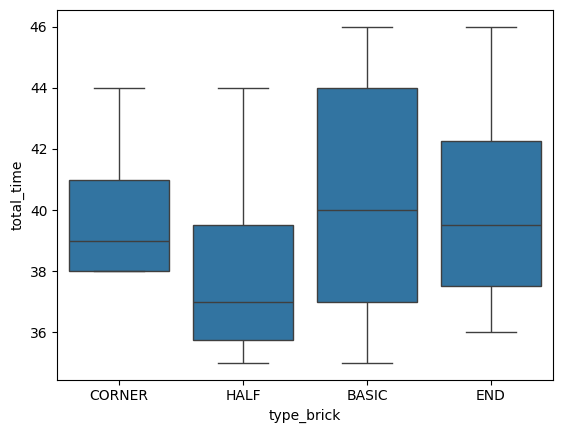

In [9]:
sns.boxplot(x='type_brick', y="total_time", data=df)

<h3 id="discriptive_statistics">3. Descriptive Statistical Analysis</h3>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

In [10]:
df.describe()

,id,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,68.273973,53002.027397,53010.232877,53025.506849,53042.123288,1.328767,8.205479,15.273973,16.616438,40.095890
std,36.290594,2890.996267,2891.219353,2890.667993,2889.291854,0.817428,3.082022,2.973308,4.172097,3.559668
min,1.000000,48679.000000,48685.000000,48703.000000,48725.000000,1.000000,4.000000,8.000000,8.000000,35.000000
25%,39.000000,50434.000000,50442.000000,50454.000000,50478.000000,1.000000,6.000000,14.000000,14.000000,37.000000
50%,66.000000,51673.000000,51679.000000,51693.000000,51719.000000,1.000000,8.000000,15.000000,16.000000,40.000000
75%,100.000000,55761.000000,55769.000000,55785.000000,55801.000000,1.000000,8.000000,16.000000,18.000000,44.000000
max,133.000000,57357.000000,57367.000000,57375.000000,57394.000000,4.000000,20.000000,24.000000,26.000000,46.000000


<h4>Value Counts</h4>

<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "type_brick". </p>

In [11]:
df['type_brick'].value_counts()

type_brick
BASIC     61
CORNER     4
HALF       4
END        4
Name: count, dtype: int64

We can convert the series to a dataframe as follows:


In [12]:
df['type_brick'].value_counts().to_frame()

,count
type_brick,
BASIC,61
CORNER,4
HALF,4
END,4


Let's repeat the above steps but save the results to the dataframe "bricks" and rename the column 'count' to 'value_counts'.

In [13]:
bricks = df['type_brick'].value_counts().to_frame()
bricks.rename(columns={'count': 'value_counts'}, inplace=True)
bricks

,value_counts
type_brick,
BASIC,61
CORNER,4
HALF,4
END,4


<h3 id="basic_grouping">4. Basics of Grouping</h3>

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "type_brick". We see that there are 3 different categories of bricks.</p>


In [14]:
df['type_brick'].unique()

array(['CORNER', 'HALF', 'BASIC', 'END'], dtype=object)

<p>If we want to know, on average, which type of brick is most valuable, we can group "type_brick" and then average them.</p>

<p>We can select the columns 'type_brick' and 'total_time', then assign it to the variable "df_group_one".</p>

In [15]:
df_group_one = df[['type_brick', 'total_time']]
df_group_one

,type_brick,total_time
0,CORNER,40
1,HALF,38
2,BASIC,36
3,BASIC,36
4,BASIC,44
...,...,...
68,END,41
69,END,36
70,BASIC,35
71,BASIC,41


We can then calculate the average time for each of the different categories of data.


In [16]:
# grouping results
df_group_one = df_group_one.groupby(['type_brick'], as_index=False).mean()
df_group_one

,type_brick,total_time
0,BASIC,40.213115
1,CORNER,40.000000
2,END,40.250000
3,HALF,38.250000


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

<p>The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the time cycle?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables</p>

<h3 id="correlation_causation">5. Correlation and Causation</h3>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [18]:
corr = df[['type', 'start_to_verif', 'verif_to_dest', 'dest_to_end', 'total_time']].corr()
corr

,type,start_to_verif,verif_to_dest,dest_to_end,total_time
type,1.000000,-0.087829,0.293866,-0.198717,-0.063490
start_to_verif,-0.087829,1.000000,-0.313901,-0.539253,-0.028406
verif_to_dest,0.293866,-0.313901,1.000000,-0.139202,0.400346
dest_to_end,-0.198717,-0.539253,-0.139202,1.000000,0.588880
total_time,-0.063490,-0.028406,0.400346,0.588880,1.000000


<Axes: >

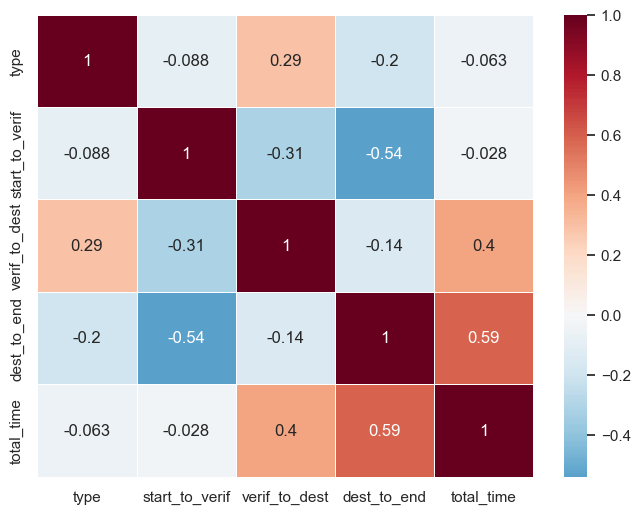

In [19]:
sns.set_theme(style="white")

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="RdBu_r",
    center=0,
    linewidths=0.5
)

Sometimes we would like to know the significant of the correlation estimate. 


<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is < 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is < 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is < 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is > 0.1: there is no evidence that the correlation is significant.</li>
</ul>


 We can obtain this information using  "stats" module in the "scipy"  library.


In [20]:
#%pip install scipy
from scipy import stats

<h4>Type of bricks vs. Total_time</h4>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'type_brick' and 'total_time'. 

In [21]:
pearson_coef, p_value = stats.pearsonr(df['type'], df['total_time'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.06348993196728624  with a P-value of P = 0.593594524591729


<p>Since the p-value is < 0.001, the correlation between type of brick and total time is statistically significant, and the linear relationship is moderately strong.</p>

<h3 id="anova">6. ANOVA</h3>


<h4>ANOVA: Analysis of Variance (Analýza rozptylu)</h4>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>

<h4>Drive Wheels</h4>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'type_brick' impact  'total_time', we group the data.</p>

In [22]:
grouped_test = df[['type_brick', 'total_time']].groupby('type_brick')
grouped_test.head()

,type_brick,total_time
0,CORNER,40
1,HALF,38
2,BASIC,36
3,BASIC,36
4,BASIC,44
5,BASIC,46
6,END,46
7,BASIC,46
14,HALF,36
15,CORNER,38


In [23]:
grouped_test.get_group('BASIC')['total_time']

2     36
3     36
4     44
5     46
7     46
      ..
66    40
67    42
70    35
71    41
72    37
Name: total_time, Length: 61, dtype: int64

#### BASIC and HALF

In [24]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('BASIC')['total_time'], grouped_test.get_group('HALF')['total_time'])

print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 1.115571035466893 , P = 0.29490763938878134


We notice that ANOVA for the categories `BASIC` and `HALF` yields a high p-value > 0.1, so the calculated F-test score is not very statistically significant. This suggests we can't reject the assumption that the means of these two groups are the same, or, in other words, we can't conclude the difference in correlation to be significant.

In [25]:
df

,id,type_brick,time_start,time_verif,time_dest,time_end,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_binned,brick_basic,brick_corner,brick_end,brick_half
0,1,CORNER,13:52:18,13:52:24,13:52:42,13:52:58,49938,49944,49962,49978,2,6,18,16,40,Normal,False,True,False,False
1,2,HALF,13:52:58,13:53:02,13:53:18,13:53:36,49978,49982,49998,50016,3,4,16,18,38,Very short,False,False,False,True
2,4,BASIC,13:56:00,13:56:06,13:56:20,13:56:36,50160,50166,50180,50196,1,6,14,16,36,Extremely short,True,False,False,False
3,6,BASIC,13:58:10,13:58:16,13:58:30,13:58:46,50290,50296,50310,50326,1,6,14,16,36,Extremely short,True,False,False,False
4,9,BASIC,14:00:34,14:00:42,14:00:54,14:01:18,50434,50442,50454,50478,1,8,12,24,44,Very long,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,120,END,15:46:22,15:46:29,15:46:53,15:47:03,56782,56789,56813,56823,4,7,24,10,41,Normal,False,False,True,False
69,121,END,15:49:23,15:49:31,15:49:43,15:49:59,56963,56971,56983,56999,4,8,12,16,36,Extremely short,False,False,True,False
70,122,BASIC,15:49:59,15:50:05,15:50:19,15:50:34,56999,57005,57019,57034,1,6,14,15,35,Extremely short,True,False,False,False
71,123,BASIC,15:50:34,15:50:49,15:51:01,15:51:15,57034,57049,57061,57075,1,15,12,14,41,Normal,True,False,False,False


<h3>Conclusion: Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the time of cycle. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>total_time</li>
    <li>start_to_verif</li>
    <li>verif_to_dest</li>
    <li>dest_to_end</li>
</ul>
    

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

# Save ready Raw dataset to the new csv:

In [26]:
df_ready = df[['id', 'type_brick', 'type', 'start_to_verif', 'verif_to_dest', 'dest_to_end', 'total_time']]

In [27]:
df_ready.to_csv('../../data/raw/ready_timelaps.csv', index=False)

#### Author/Date/Organization

Vjaceslav Usmanov, CTU in Prague

###### Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2026-01-21 | 1.1 | Vjaceslav Usmanov| added DS_03_Features.ipynb |
| 2026-02-12 | 1.2 | Vjaceslav Usmanov| changed DS_03_Features.ipynb |